In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
IMAGE_SIZE = [224, 224]

train_path = 'D:\\chest_xray\\train'
valid_path = 'D:\\chest_xray\\test'

In [4]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in resnet.layers:
    layer.trainable = False

In [6]:
folders = glob('D:\\chest_xray\\train/*')

In [7]:
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('D:\\chest_xray\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory('D:\\chest_xray\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=80,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/80
163/163 [==============================] - 191s 1s/step - loss: 0.7040 - accuracy: 0.7905 - val_loss: 0.4097 - val_accuracy: 0.8045
Epoch 2/80
163/163 [==============================] - 264s 2s/step - loss: 0.3222 - accuracy: 0.8635 - val_loss: 0.3537 - val_accuracy: 0.8526
Epoch 3/80
163/163 [==============================] - 328s 2s/step - loss: 0.3902 - accuracy: 0.8558 - val_loss: 0.5998 - val_accuracy: 0.7788
Epoch 4/80
163/163 [==============================] - 331s 2s/step - loss: 0.2892 - accuracy: 0.8859 - val_loss: 0.5306 - val_accuracy: 0.7917
Epoch 5/80
163/163 [==============================] - 328s 2s/step - loss: 0.3050 - accuracy: 0.8831 - val_loss: 0.3116 - val_accuracy: 0.8686
Epoch 6/80
163/163 [==============================] - 329s 2s/step - loss: 0.3545 - accuracy: 0.8781 - val_loss: 0.3227 - val_accuracy: 0.8766
Epoch 7/80
163/163 [==============================] - 330s 2s/step - loss: 0.2408 - accuracy: 0.9068 - val_loss: 0.7011 - val_accuracy: 0.7628

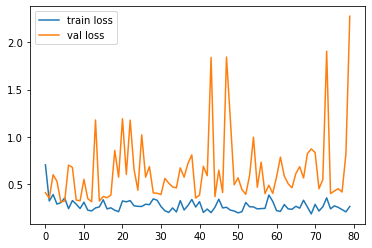

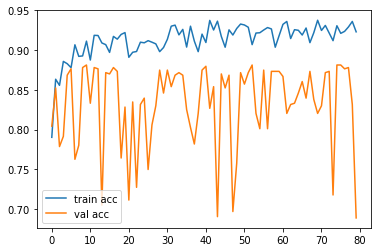

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')